# Week 2: Phishing Website Detection
## Dataset Exploration & Exploratory Data Analysis (EDA)

**Intern Name:** Shete Rupesh Sanjay      
**Internship Program:** CodeB – Data Science Internship
**Week:** 2 

**Task is**

Deliverables

Descriptive Statistics Report
Summary statistics for numerical features, including mean, median, standard deviation, minimum, and maximum values.
Frequency distribution and mode for categorical features.
Insights into the central tendency, dispersion, and distribution of the data.
Visual Analysis Report
Histograms: Visual representation of the distribution of numerical features to identify patterns or skewness.
Pair Plots: Visualization of relationships between pairs of numerical features to identify correlations or trends.
Heatmaps: Correlation matrix heatmap to identify relationships between features and their potential relevance to the target variable.
Insights and Recommendations
Highlight significant findings from the statistical and visual analysis, such as highly correlated features or features with significant variability.
Provide actionable recommendations for data preprocessing, such as handling missing values, normalizing features, or balancing the dataset.

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

**Load Dataset**

In [2]:
df = pd.read_csv("dataset_phishing.csv")

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (11430, 89)


In [4]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


**Dataset Overview**

In [5]:
print("\nDataset Information:\n")
df.info()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_perce

In [6]:
print("\nMissing Values (Total):")
print(df.isnull().sum().sum())


Missing Values (Total):
0


**Descriptive Statistics Report (Numerical Features)**

Selecting numerical features

In [7]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
length_url,11430.0,61.126684,5.529732e+01,12.0,33.00,47.0,71.00,1641.0
length_hostname,11430.0,21.090289,1.077717e+01,4.0,15.00,19.0,24.00,214.0
ip,11430.0,0.150569,3.576436e-01,0.0,0.00,0.0,0.00,1.0
nb_dots,11430.0,2.480752,1.369686e+00,1.0,2.00,2.0,3.00,24.0
nb_hyphens,11430.0,0.997550,2.087087e+00,0.0,0.00,0.0,1.00,43.0
...,...,...,...,...,...,...,...,...
domain_age,11430.0,4062.543745,3.107785e+03,-12.0,972.25,3993.0,7026.75,12874.0
web_traffic,11430.0,856756.643307,1.995606e+06,0.0,0.00,1651.0,373845.50,10767986.0
dns_record,11430.0,0.020122,1.404254e-01,0.0,0.00,0.0,0.00,1.0
google_index,11430.0,0.533946,4.988682e-01,0.0,0.00,1.0,1.00,1.0


In [8]:
stats_df = pd.DataFrame({
    "Mean": numerical_features.mean(),
    "Median": numerical_features.median(),
    "Std Dev": numerical_features.std(),
    "Min": numerical_features.min(),
    "Max": numerical_features.max()
})
stats_df

,Mean,Median,Std Dev,Min,Max
length_url,61.126684,47.0,5.529732e+01,12.0,1641.0
length_hostname,21.090289,19.0,1.077717e+01,4.0,214.0
ip,0.150569,0.0,3.576436e-01,0.0,1.0
nb_dots,2.480752,2.0,1.369686e+00,1.0,24.0
nb_hyphens,0.997550,0.0,2.087087e+00,0.0,43.0
...,...,...,...,...,...
domain_age,4062.543745,3993.0,3.107785e+03,-12.0,12874.0
web_traffic,856756.643307,1651.0,1.995606e+06,0.0,10767986.0
dns_record,0.020122,0.0,1.404254e-01,0.0,1.0
google_index,0.533946,1.0,4.988682e-01,0.0,1.0


**Frequency Distribution & Mode (Categorical Features)**

In [9]:
categorical_features = df.select_dtypes(include=["object"])

for col in categorical_features.columns:
    print(f"\nFeature: {col}")
    print("Mode:", df[col].mode()[0])
    print(df[col].value_counts())


Feature: url
Mode: http://e710z0ear.du.r.appspot.com/c:/users/user/downlo
url
http://e710z0ear.du.r.appspot.com/c:/users/user/downlo                                                                                                                                                                                                                                                                                                                                                                                                                                           2
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                 

***Visual Analysis Report***

**Histograms (Numerical Features)**

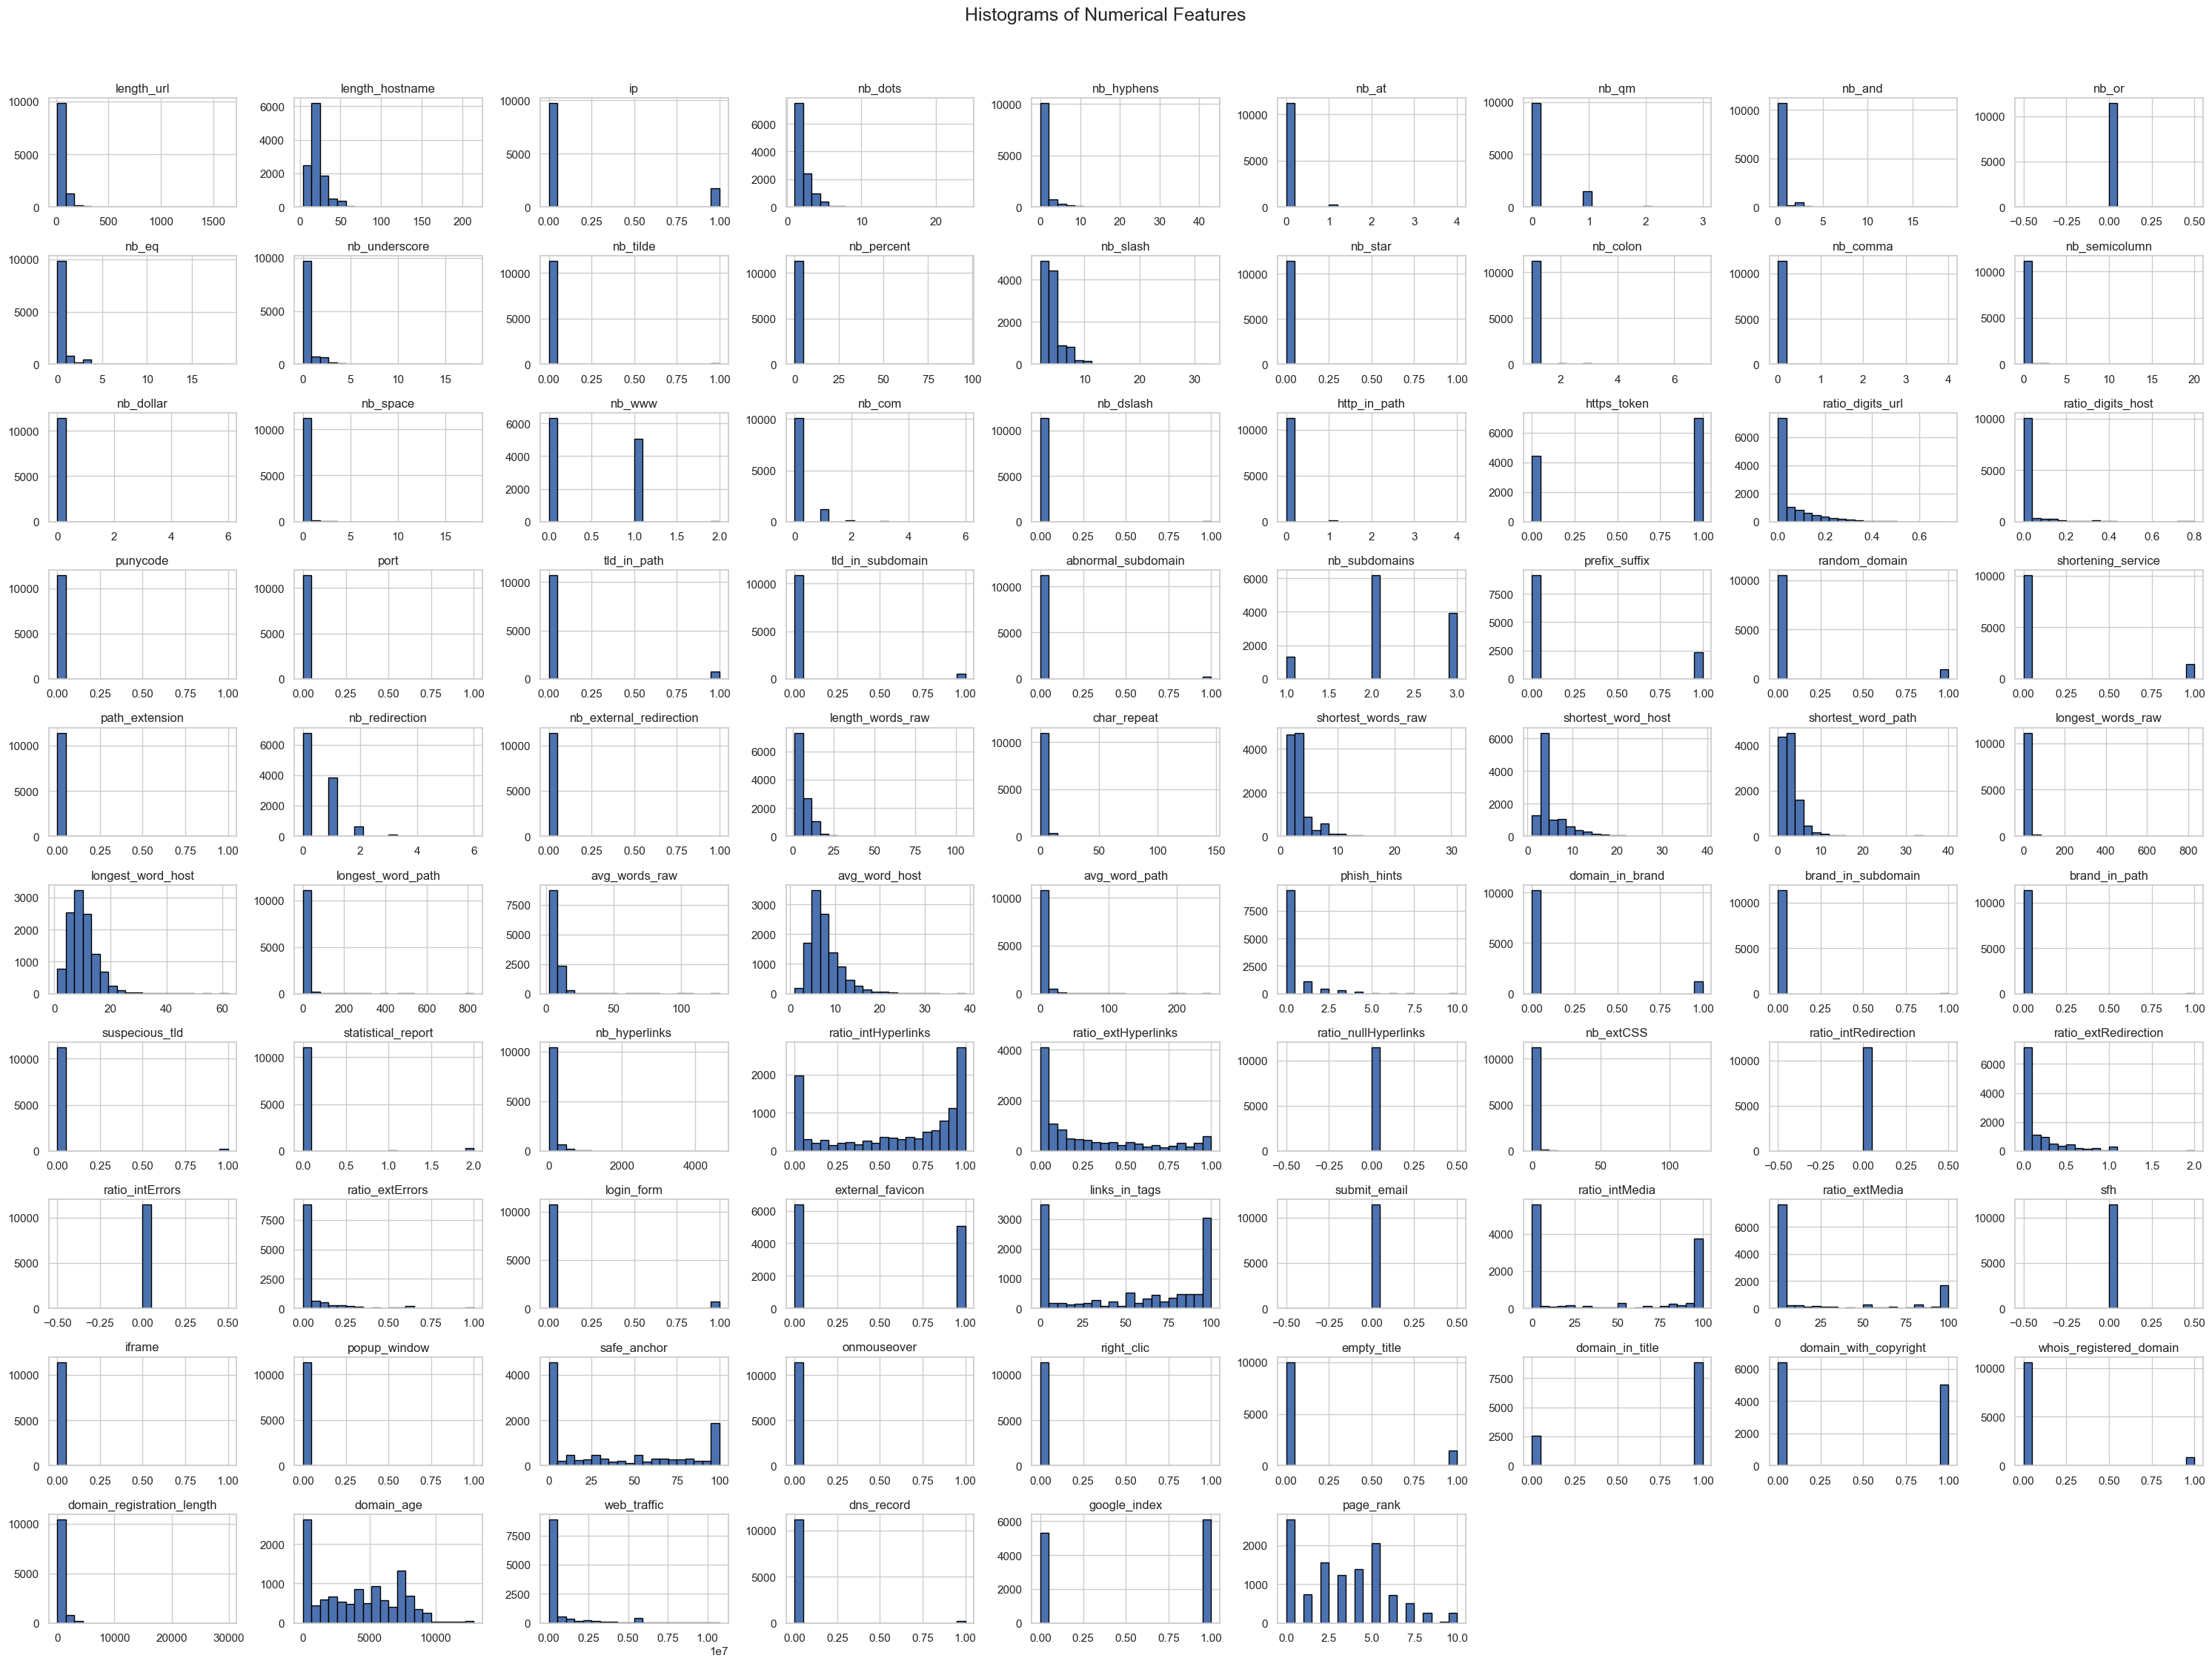

In [10]:
numerical_features.hist(
    bins=20,
    figsize=(30, 22),
    edgecolor='black'
)
plt.suptitle(
    "Histograms of Numerical Features",
    fontsize=18,
    y=1.02
)
plt.tight_layout()
plt.show()


**Pair Plot Analysis**

In [11]:
# # # Sampling to avoid heavy computation
# sample_df = numerical_features.sample(min(300, len(df)), random_state=42)
# sns.pairplot(sample_df)
# plt.show()

**Correlation Heatmap Analysis**

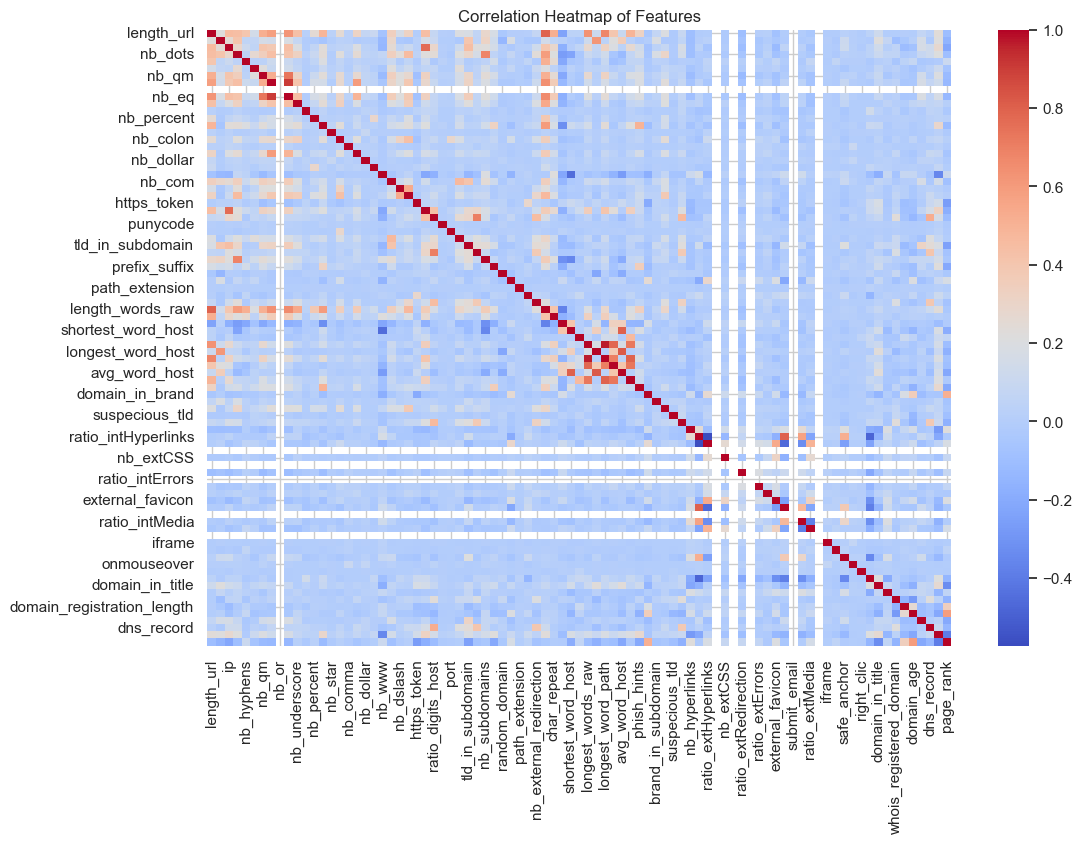

In [12]:
corr_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

**Insights & Recommendations**

In [13]:
print("Insights & Recommendations:")
print("- High variance observed in URL and symbol-based features")
print("- Several numerical features show right-skewed distributions")
print("- Strong correlations detected among some features (multicollinearity)")
print("- Dataset shows no significant missing values")
print("- Feature scaling and feature selection are recommended before model training")
print("- Dataset appears balanced; no resampling required")


print("\nWeek 2 Descriptive Statistics & Visual Analysis Completed Successfully")

Insights & Recommendations:
- High variance observed in URL and symbol-based features
- Several numerical features show right-skewed distributions
- Strong correlations detected among some features (multicollinearity)
- Dataset shows no significant missing values
- Feature scaling and feature selection are recommended before model training
- Dataset appears balanced; no resampling required

Week 2 Descriptive Statistics & Visual Analysis Completed Successfully


### Key Findings & Recommendations

**Findings:**
- Certain features exhibit strong correlations with each other.
- High variance features may be strong predictors for phishing detection.
- Some distributions are skewed and may benefit from normalization.

**Recommendations:**
- Handle missing values (if any) using imputation techniques.
- Apply feature scaling (StandardScaler / MinMaxScaler) before modeling.
- Address class imbalance using SMOTE or class weighting if required.
- Perform feature selection during the model development phase (Week 3).
